<a href="https://colab.research.google.com/github/peronvidal/tp-grupal-3-marias/blob/master/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# sns.set(rc={'figure.figsize':(15,5)})

In [4]:
!wget https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/credit-card-fraud/card_transdata.csv

--2023-05-31 23:07:35--  https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/credit-card-fraud/card_transdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76277977 (73M) [text/plain]
Saving to: ‘card_transdata.csv.3’

card_transdata.csv. 100%[===================>]  72.74M   174MB/s    in 0.4s    

2023-05-31 23:07:35 (174 MB/s) - ‘card_transdata.csv.3’ saved [76277977/76277977]



In [5]:
df = pd.read_csv('card_transdata.csv')
# orig_df= pd.read_csv('card_transdata.csv')

In [6]:
df.info()
# parece que esta todo ok 
# Feature Explanation:
# distance_from_home - the distance from home where the transaction happened. distancia desde el domicilio declarado en la tarjeta desde donde ocurrió la transacción
# distance_from_last_transaction - the distance from last transaction happened. distancia desde donde se hizo la ultima transaccion con esa tarjeta
# ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price. te la debo
# repeat_retailer - Is the transaction happened from same retailer. si la transaccion ocurrio desde el mismo vendedor o cobrador?
# used_chip - Is the transaction through chip (credit card). si la transaccion se realizo mediante chip
# used_pin_number - Is the transaction happened by using PIN number. si la transaccion se realizo ingresando un numero de PIN
# online_order - Is the transaction an online order. si la transaccion fue una compra online
# fraud - Is the transaction fraudulent. booleano, determina si esa transaccion fue fraudulenta o no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
# Me muestra todos los posibles valores en cada columna
for col in df:
    print(df[col].name,df[col].unique())

distance_from_home [57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]
distance_from_last_transaction [0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]
ratio_to_median_purchase_price [1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]
repeat_retailer [1. 0.]
used_chip [1. 0.]
used_pin_number [0. 1.]
online_order [0. 1.]
fraud [0. 1.]


In [41]:
sample = df.sample(10000,random_state=42)

In [9]:
# sns.displot(data=df, x="fraud",y="distance_from_home")

In [42]:
X_sample = sample.drop('fraud', axis=1)
y_sample = sample['fraud']
X = df.drop('fraud',axis=1)
y = df['fraud'] 
### Por las dudas volvemos a hacer la separación
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=250, 
                                                    random_state=2023)
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X, y, 
                                                    test_size=250, 
                                                    random_state=2023)

In [43]:

# Grilla para Grid Search
max_depth_list = [1,3,5,7,9,11]
min_samples_split_list = [10,20,30,40,50,60]
min_samples_leaf_list = [10,20,30,40,50,60]
max_features_list = [1,2,3,4,5]

arbol = DecisionTreeClassifier()
 
param_grid = {
'max_depth': max_depth_list,
'min_samples_split': min_samples_split_list,
'min_samples_leaf': min_samples_leaf_list,
'max_features': max_features_list
}

clf = GridSearchCV(estimator=arbol,param_grid=param_grid,scoring='accuracy')
clf.fit(X_sample_train,y_sample_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60],
                         'min_samples_split': [10, 20, 30, 40, 50, 60]},
             scoring='accuracy')

In [44]:
print("Mejores parametros: "+str(clf.best_params_))
print("Mejor Score: "+ str(clf.best_score_)+'\n')

scores = pd.DataFrame(clf.cv_results_)
scores

Mejores parametros: {'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 50}
Mejor Score: 0.9999719929982496



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.503747,0.451682,0.059496,0.023845,1,1,10,10,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",0.912593,0.912593,0.912593,0.912593,0.912593,0.912593,0.000000,1054
1,0.405941,0.264054,0.045425,0.041843,1,1,10,20,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",0.912593,0.912593,0.912593,0.912593,0.912593,0.912593,0.000000,1054
2,0.183419,0.073538,0.022128,0.001520,1,1,10,30,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",0.912593,0.912593,0.939950,0.938575,0.912593,0.923261,0.013072,978
3,0.092212,0.002485,0.022490,0.002077,1,1,10,40,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",0.912593,0.912593,0.912593,0.912593,0.912593,0.912593,0.000000,1054
4,0.123505,0.065003,0.020778,0.000335,1,1,10,50,"{'max_depth': 1, 'max_features': 1, 'min_sampl...",0.912593,0.912593,0.912593,0.912593,0.912593,0.912593,0.000000,1054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.557349,0.226713,0.028112,0.005936,11,5,60,20,"{'max_depth': 11, 'max_features': 5, 'min_samp...",0.999690,0.999825,0.999775,0.999845,0.999845,0.999796,0.000059,94
1076,1.642061,0.336456,0.025004,0.003290,11,5,60,30,"{'max_depth': 11, 'max_features': 5, 'min_samp...",0.999750,0.999805,0.999780,0.999830,0.999855,0.999804,0.000037,82
1077,1.617557,0.141907,0.029912,0.007972,11,5,60,40,"{'max_depth': 11, 'max_features': 5, 'min_samp...",0.999720,0.999815,0.999825,0.999660,0.999790,0.999762,0.000063,109
1078,1.538020,0.341227,0.027410,0.006332,11,5,60,50,"{'max_depth': 11, 'max_features': 5, 'min_samp...",0.999770,0.999850,0.999620,0.999715,0.999805,0.999752,0.000079,115


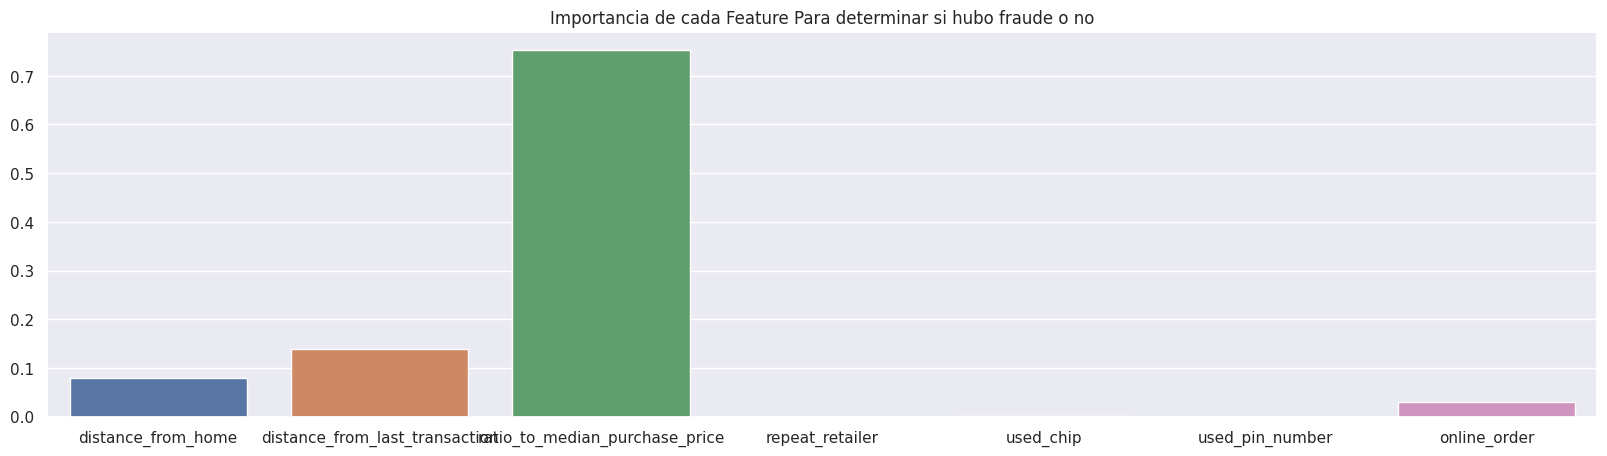

In [25]:

sns.set(rc={'figure.figsize':(20,5)})
importances = clf.best_estimator_.feature_importances_
columns = X.columns
#print()
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature Para determinar si hubo fraude o no')
plt.show()

In [49]:
# Mejores hiperparametros obtenidos del cros validation utilizando un sample de 1000 instancias
# 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 40}
# Mejores hiperparametros obtenidos del cros validation utilizando un sample de 10000 instancias
# Mejores parametros: {'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 50}
clf2 = DecisionTreeClassifier(max_depth=7,max_features=1,min_samples_leaf=10,min_samples_split=40)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.924

<Axes: >

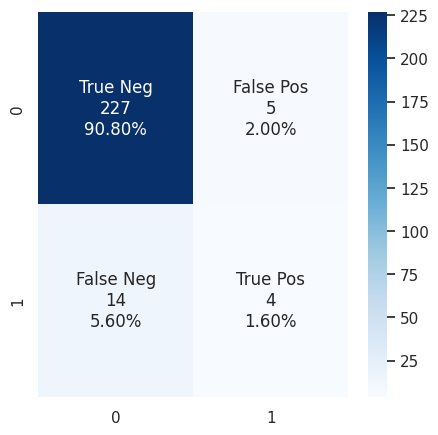

In [50]:
sns.set(rc={'figure.figsize':(5,5)})
y_pred_arbol = clf2.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_arbol)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')